<a href="https://colab.research.google.com/github/gui98araujo/Amb_Git/blob/main/Regressao_linear_simples_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
imovel=pd.read_excel('/content/Cópia de imoveis.xlsx')
imovel.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [3]:
imovel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


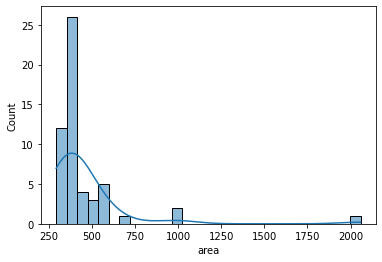

In [4]:
sns.histplot(imovel,x='area', kde=True);

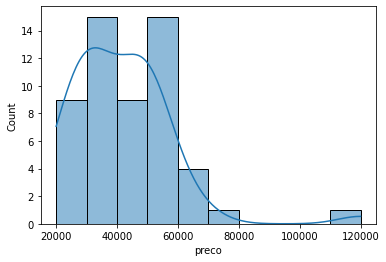

In [5]:
sns.histplot(imovel,x='preco', kde=True);

In [6]:
imovel.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


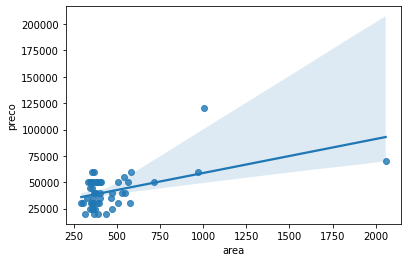

In [7]:
sns.regplot(x='area',y='preco',data=imovel)

In [8]:
imovel.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [10]:
imovel_norm = pd.DataFrame(scaler.fit_transform(imovel), index=imovel.index, columns=imovel.columns)

In [11]:
imovel_norm

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05
5,0.041375,0.00
6,0.004234,0.10
7,0.100751,0.05
8,0.045291,0.20
9,0.028282,0.30


In [12]:
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


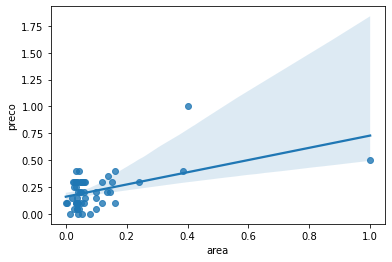

In [13]:
sns.regplot(x='area',y='preco',data=imovel_norm)

In [14]:
import statsmodels.formula.api as smf

In [15]:
function='preco~area'
model=smf.ols(formula=function,data=imovel_norm).fit()

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           7.76e-05
Time:                        04:14:12   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

In [17]:
x=imovel_norm[['area']]
y=imovel_norm[['preco']]

In [18]:
x_treino,x_teste, y_treino, y_teste=train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(x_treino,y_treino)


LinearRegression()

In [19]:
r_sq =lr.score(x_treino,y_treino)

In [20]:
print(r_sq)

0.2754399686961232


In [21]:
y_pred_treino=lr.predict(x_treino)

In [22]:
print('MAE', metrics.mean_absolute_error(y_treino,y_pred_treino))
print('MSE', metrics.mean_squared_error(y_treino,y_pred_treino))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))

MAE 0.1068423059800295
MSE 0.019987119738590717
RMSE 0.1413758103021543


In [23]:
lr.fit(x_teste,y_teste)

LinearRegression()

In [24]:
y_pred_teste=lr.predict(x_teste)
print('MAE', metrics.mean_absolute_error(y_teste,y_pred_teste))
print('MSE', metrics.mean_squared_error(y_teste,y_pred_teste))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_teste,y_pred_teste)))

MAE 0.10852020952335328
MSE 0.01746864564020875
RMSE 0.13216900408268478


#APROVAÇÃO MEC

In [56]:
alunos=pd.read_excel('/content/C├│pia de aprovacao_alunos.xlsx')
alunos.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [26]:
alunos.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
#Não é necessário fazer uma normalização, mas faremos para fins didáticos

In [28]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [27]:
alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


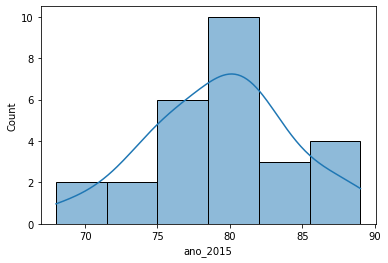

In [32]:
sns.histplot(data=alunos, x='ano_2015', kde=True)

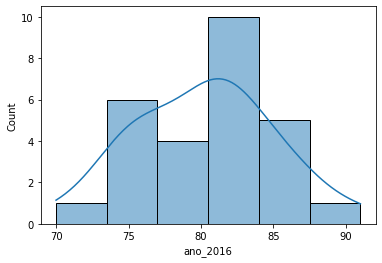

In [33]:
sns.histplot(data=alunos, x='ano_2016', kde=True)

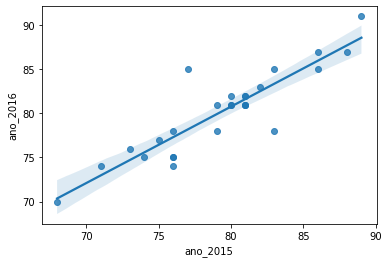

In [34]:
sns.regplot(x='ano_2015',y='ano_2016',data=alunos)

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [58]:
aluno_norm=pd.DataFrame(scaler.fit_transform(alunos),index=alunos.index,columns=alunos.columns)

In [37]:
aluno_norm

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714
5,0.380952,0.238095
6,0.619048,0.571429
7,0.619048,0.523810
8,0.571429,0.523810
9,0.857143,0.714286


In [39]:
aluno_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


In [40]:
import statsmodels.formula.api as smf
function= 'ano_2016~ano_2015'
model=smf.ols(formula=function,data=aluno_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.02e-10
Time:                        04:22:08   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7

In [59]:
x=aluno_norm[['ano_2015']]
y=aluno_norm[[ 'ano_2016']]

In [60]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [66]:
lr=LinearRegression()

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
r_sq=lr.score(x_train,y_train)

In [65]:
print(r_sq)

0.8800910056640281


In [69]:
y_predict_train=lr.predict(x_train)

In [70]:
print('MAE', metrics.mean_absolute_error(y_train,y_predict_train))
print('MSE', metrics.mean_squared_error(y_train,y_predict_train))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train,y_predict_train)))

MAE 0.06313092719197842
MSE 0.006947385853516443
RMSE 0.08335097991935334


In [71]:
y_predict_test=lr.predict(x_test)

In [72]:
print('MAE', metrics.mean_absolute_error(y_test,y_predict_test))
print('MSE', metrics.mean_squared_error(y_test,y_predict_test))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE 0.10156392395533688
MSE 0.02234792217796548
RMSE 0.14949221443929941
